# Import Libraries & Datasets

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [49]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


# Which NYC schools have the best math results?

Here, our goal is to find the NYC schools that have the best math results. To find it, first we need to define the threshold for the best math score. 

Because the threshold is defined as 80% of the maximum score and the maximum possible score in Math is assumed to be `800`, thus we define the threshold `0.8 x 800`.

In [50]:
# Define the threshold for the best math results
threshold = 0.8 * 800

print(threshold)

640.0


After we define the threshold, next we need to filter schools with scores above the threshold. We can do this by selecting rows where the school's average math score (average_math) is greater than or equal to `640` (threshold).

In [51]:
# Filter the schools that have at least 80% of the maximum possible score in math
best_math_schools = schools[schools['average_math'] >= threshold][['school_name', 'average_math']]

display(best_math_schools)

,school_name,average_math
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641
68,"High School for Mathematics, Science, and Engi...",683
88,Stuyvesant High School,754
93,Staten Island Technical High School,711
170,Bronx High School of Science,714
174,High School of American Studies at Lehman College,669
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
365,Queens High School for the Sciences at York Co...,701


Now, we have the list of schools that meet the specified threshold, which are the schools with the best math results. Next, we need to sort it out in descending order and select only the `school_name` and `average_math` columns to show which schools have the best math results.

In [52]:
# Sort the result by "average_math" in descending order
best_math_schools = best_math_schools.sort_values(by='average_math', ascending=False)

# Display the result
display(best_math_schools)

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


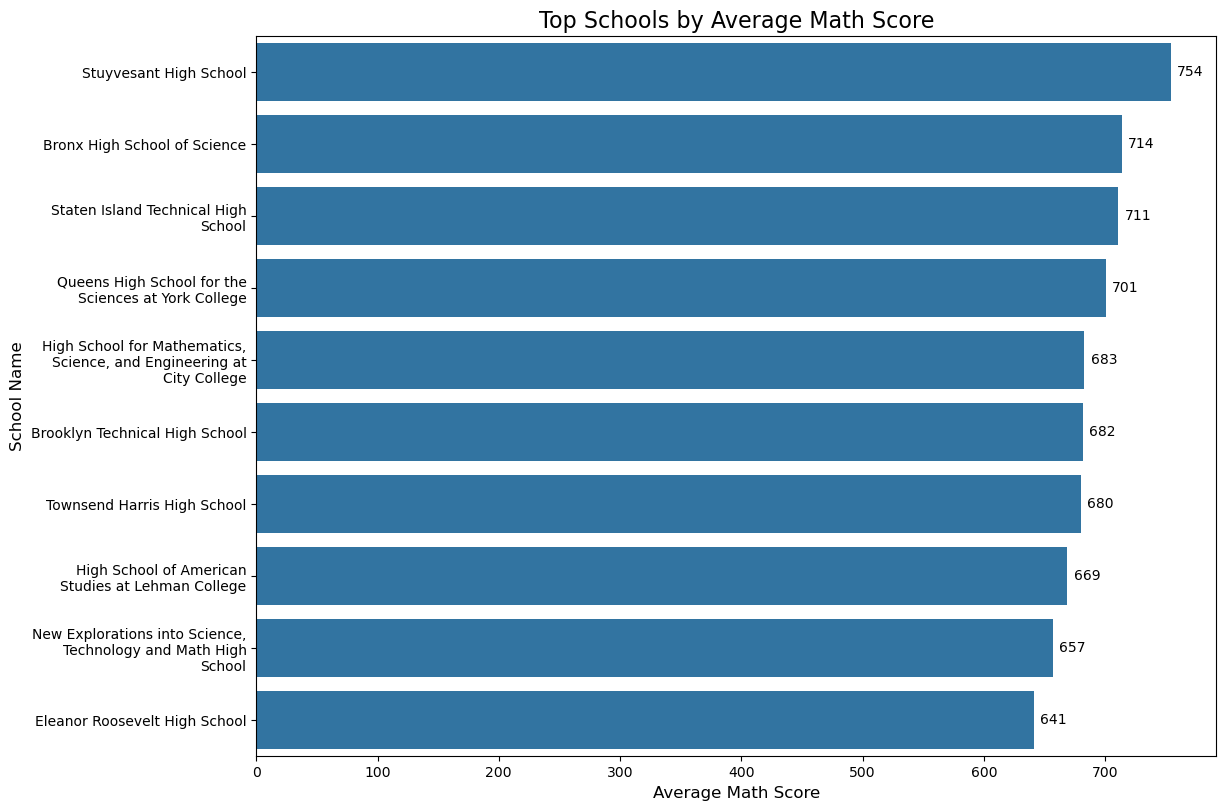

In [57]:
# Wrap labels
max_label_length = 30  # Define the maximum character length per line for wrapping
best_math_schools['wrapped_labels'] = best_math_schools['school_name'].apply(lambda x: "\n".join(textwrap.wrap(x, width=max_label_length)))

# Plotting
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x="average_math",
    y="wrapped_labels",
    data=best_math_schools
)

# Adding titles and labels
plt.title("Top Schools by Average Math Score", fontsize=16)
plt.xlabel("Average Math Score", fontsize=12)
plt.ylabel("School Name", fontsize=12)

# Add number labels on top of each bar
for i, bar in enumerate(ax.patches):
    # Get the height of each bar (which corresponds to average_math)
    bar_height = bar.get_width()
    
    # Place the label on top of the bar, slightly offset to the right
    ax.text(
        int(bar_height) + 5,  # Position the label slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Position the label vertically centered within the bar
        f'{int(bar_height)}',  # The label is the average_math score (width of the bar)
        color='black',  # Set label color
        ha="left",  # Align the label to the left of the bar
        va="center",  # Vertically center the label
        fontsize=10  # Set label font size
    )

# Manually adjust the layout to make space for labels
plt.subplots_adjust(left=0.2, right=1, top=0.95, bottom=0.05)

# Show plot
plt.show()

From this graph, we know that there are 10 schools that have the average Math score above the threshold.

# What are the top 10 performing schools based on the combined SAT scores?

This time, we're going to find the top performing schools based on the combined SAT scores.

First, we calculate the total SAT score for each school. We can do this by adding up the score from the SAT sections (`average_math` `average_reading`, `average_writing`) for each school to compute the total score.

In [62]:
# Calculate the total SAT score for each school
schools['total_SAT'] = schools['average_math'] + schools['average_reading'] + schools['average_writing']

schools[['average_math', 'average_reading', 'average_writing', 'total_SAT']].head()

,average_math,average_reading,average_writing,total_SAT
0,657,601,601,1859
1,395,411,387,1193
2,418,428,415,1261
3,613,453,463,1529
4,410,406,381,1197


Next, we sort the schools by `total_SAT` in descending order and select the top 10 schools using `head`. This will result in the top 10 schools with the highest SAT scores.

In [63]:
# Sort the schools by total SAT score in descending order
top_10_schools = schools[['school_name', 'total_SAT']].sort_values(by='total_SAT', ascending=False).head(10)

# Display the result
display(top_10_schools)

,school_name,total_SAT
88,Stuyvesant High School,2144
170,Bronx High School of Science,2041
93,Staten Island Technical High School,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
45,Eleanor Roosevelt High School,1889
68,"High School for Mathematics, Science, and Engi...",1889


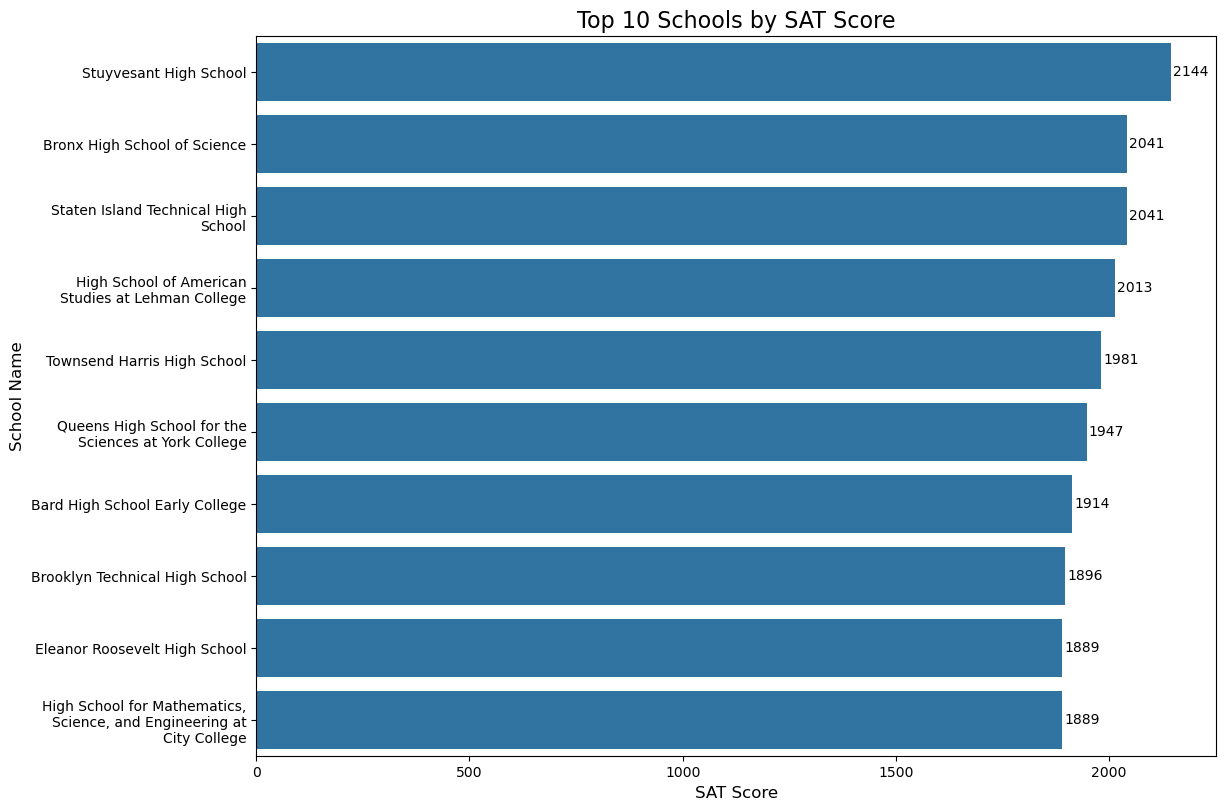

In [66]:
# Wrap labels
max_label_length = 30  # Define the maximum character length per line for wrapping
top_10_schools['wrapped_labels'] = top_10_schools['school_name'].apply(lambda x: "\n".join(textwrap.wrap(x, width=max_label_length)))

# Plotting
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x="total_SAT",
    y="wrapped_labels",
    data=top_10_schools
)

# Adding titles and labels
plt.title("Top 10 Schools by SAT Score", fontsize=16)
plt.xlabel("SAT Score", fontsize=12)
plt.ylabel("School Name", fontsize=12)

# Add number labels on top of each bar
for i, bar in enumerate(ax.patches):
    # Get the height of each bar (which corresponds to average_math)
    bar_height = bar.get_width()
    
    # Place the label on top of the bar, slightly offset to the right
    ax.text(
        int(bar_height) + 5,  # Position the label slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Position the label vertically centered within the bar
        f'{int(bar_height)}',  # The label is the average_math score (width of the bar)
        color='black',  # Set label color
        ha="left",  # Align the label to the left of the bar
        va="center",  # Vertically center the label
        fontsize=10  # Set label font size
    )

# Manually adjust the layout to make space for labels
plt.subplots_adjust(left=0.2, right=1, top=0.95, bottom=0.05)

# Show plot
plt.show()

# Which single borough has the largest standard deviation in the combined SAT score?

Okay, now let's find the single borough that has the largest Standard Deviation in the combined SAT score.

First, group all the schools by borough and calculate the aggregate statistics (`mean`, `std`, `count`) of the total SAT score for each borough, and rename the columns to make them clear.

In [68]:
# Group by borough and calculate the required statistics
borough_stats = schools.groupby('borough')['total_SAT'].agg(['mean', 'std', 'count']).reset_index()

# Rename the columns for clarity
borough_stats.columns = ['borough', 'average_SAT', 'std_SAT', 'num_schools']

display(borough_stats)

,borough,average_SAT,std_SAT,num_schools
0,Bronx,1202.724490,150.393901,98
1,Brooklyn,1230.256881,154.868427,109
2,Manhattan,1340.134831,230.294140,89
3,Queens,1345.478261,195.252899,69
4,Staten Island,1439.000000,222.303596,10


After we have the required statistics, we can use `.idxmax()` on the `std_SAT` column to locate the borough with the largest standard deviation, and round the output to two decimal places to make it more readable.

In [76]:
# Find the borough with the largest standard deviation in total SAT score
largest_std_dev = borough_stats.loc[borough_stats['std_SAT'].idxmax()].copy()

# Round the numeric values to two decimal places
largest_std_dev['average_SAT'] = largest_std_dev['average_SAT'].round(2)
largest_std_dev['std_SAT'] = largest_std_dev['std_SAT'].round(2)

display(largest_std_dev)

borough        Manhattan
average_SAT      1340.13
std_SAT           230.29
num_schools           89
Name: 2, dtype: object

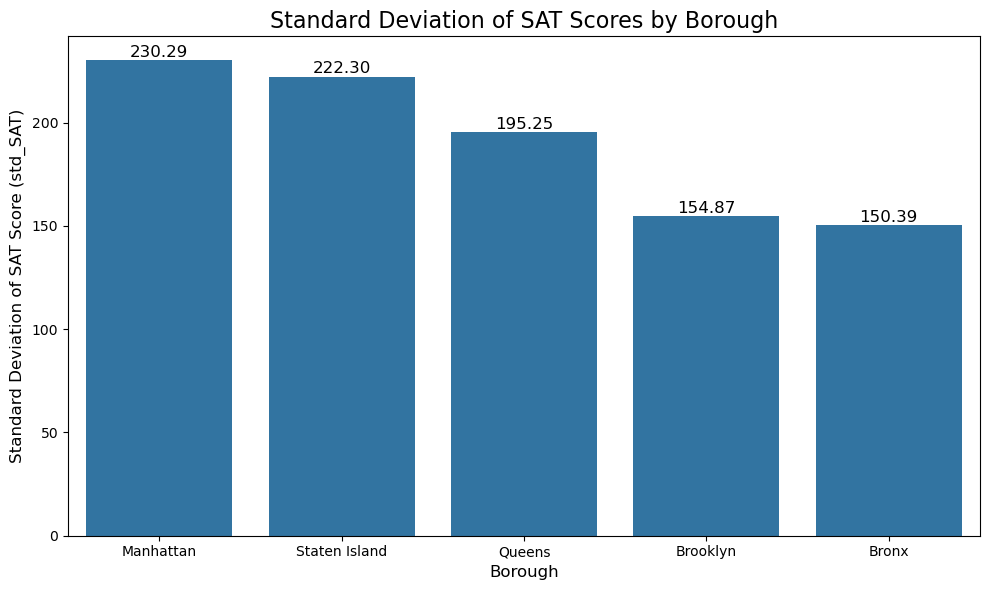

In [79]:
# Sort boroughs by std_SAT in descending order
borough_stats_sorted = borough_stats.sort_values(by='std_SAT', ascending=False)

# Plotting the column chart (barplot)
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='borough',
    y='std_SAT',
    data=borough_stats_sorted
)

# Add labels on top of each bar
for bar in ax.patches:
    # Get the height of each bar (std_SAT)
    height = bar.get_height()
    
    # Add a label above the bar
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Position the label at the center of the bar
        height + 0.1,  # Place the label slightly above the bar
        f'{height:.2f}',  # Format the label as a float with 2 decimal places
        color='black',  # Color of the text
        ha="center",  # Horizontally center the text
        va="bottom",  # Vertically place the text just above the bar
        fontsize=12  # Font size for the text
    )

# Add titles and labels
plt.title("Standard Deviation of SAT Scores by Borough", fontsize=16)
plt.xlabel("Borough", fontsize=12)
plt.ylabel("Standard Deviation of SAT Score (std_SAT)", fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

We can see that `Manhattan` is a borough that has the largest standard deviation in the combined SAT score. 

Additionally, we can make this output in a more readable format by converting it to a data frame. 

In [72]:
# Convert the result to a DataFrame
largest_std_dev = largest_std_dev.to_frame().T

# Display the result
display(largest_std_dev)

,borough,average_SAT,std_SAT,num_schools
2,Manhattan,1340.13,230.29,89


We can also plot the distribution of Manhattan's `total_SAT` scores in a histogram to check its accuracy.

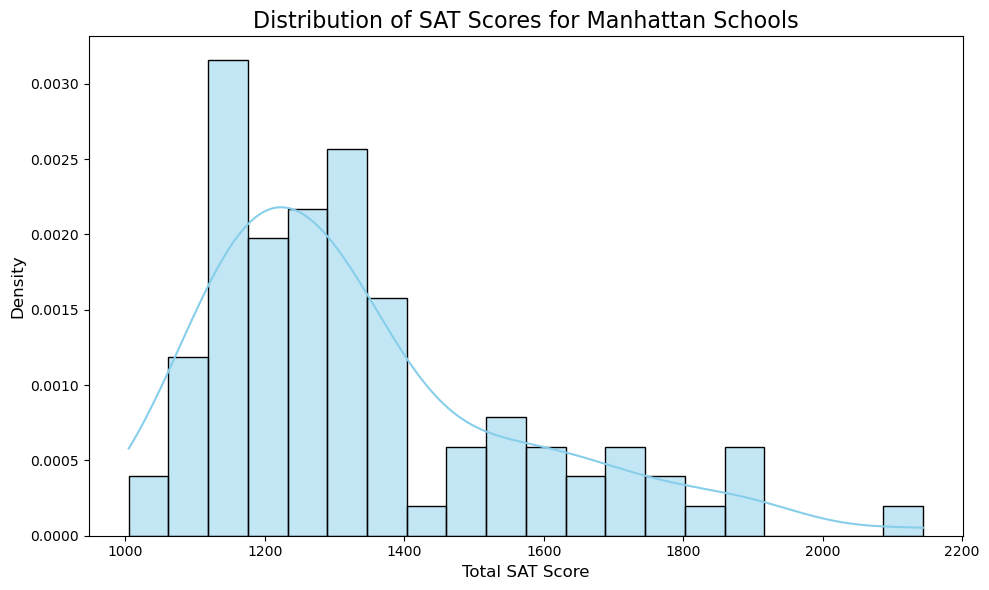

In [85]:
manhattan_data = schools[schools['borough'] == 'Manhattan']

# Plotting a histogram to show the distribution of 'total_SAT' scores for Manhattan
plt.figure(figsize=(10, 6))
sns.histplot(manhattan_data['total_SAT'], bins=20, kde=True, color='skyblue', stat='density')

# Add title and labels
plt.title("Distribution of SAT Scores for Manhattan Schools", fontsize=16)
plt.xlabel("Total SAT Score", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()